In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import LJhelperfunctions as LJhelp
import seaborn as sns

# Plt rcParams font family
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'


# Whitesmoke background
plt.rcParams['axes.facecolor'] = 'whitesmoke'


# Grid style
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['axes.grid'] = True


# Assignment 3
### *Niels August Davidsen (phx657)*
#### Handin: Oct. 6th. 12am

___
I made two PDFs for this assignment:
1. (assignment3_WMC.pdf) A PDF including all of the functions desribed in the exercises along with all plots, markdown and printouts.

2. (assignment3.pdf) A PDF where most of the code is hidden including the functions mentioned in the assignment text. Printouts, markdown and figures as left as the only answer for the exercises.

Please note in the assignent comments which one is the best for you to correct. 


# Questions for Week 4: Solving Nonlinear equations

## *(A1) + (A2) Potenials for N=2 and N=4 particals*


In [28]:
def V_two(x):
    x0 = np.array([x, 0, 0])
    x1 = np.array([0, 0, 0])
    points = np.vstack((x0, x1))

    strength = LJhelp.V(points)
    return strength

def V_four(x):

    x0 = np.array([x, 0, 0])
    x1 = np.array([0, 0, 0])
    x2 = np.array([14, 0, 0])
    x3 = np.array([7, 3.2, 0])
    points = np.vstack((x0, x1, x2, x3))

    strength = LJhelp.V(points)
    return strength


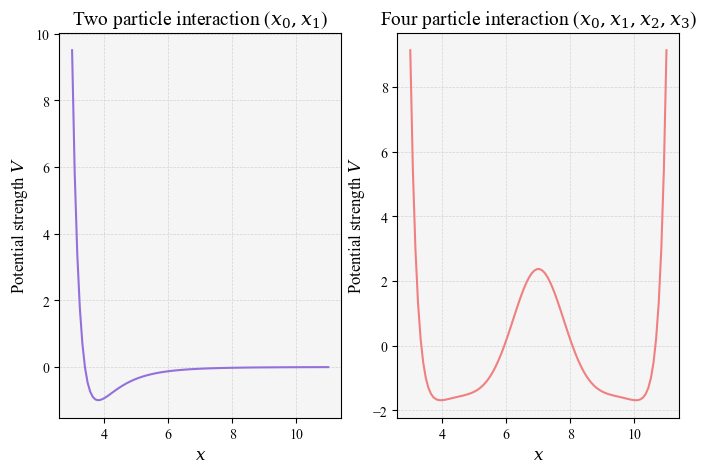

In [3]:

x = np.linspace(3, 11, 100)
V_str_1st = [V_two(xi) for xi in x]
V_str_2nd = [V_four(xi) for xi in x]

fig, ax = plt.subplots(1, 2, figsize=(8, 5), dpi=100)
ax[0].set_title(r'Two particle interaction ($x_0, x_1$)', fontsize=14)
ax[0].plot(x, V_str_1st, color='mediumpurple')
ax[0].set_xlabel(r'$x$', fontsize=12)
ax[1].set_title(r'Four particle interaction ($x_0, x_1, x_2, x_3$)', fontsize=14)
ax[1].plot(x, V_str_2nd, color='lightcoral')
ax[1].set_xlabel(r'$x$', fontsize=12)

for a in ax:
    
    a.set_ylabel(r'Potential strength $V$', fontsize=12)
    a.tick_params(axis='both', which='major', labelsize=10)


The two plots shown above are plots of the LJ-potential for a two particle system and a four particle system. The only variable in the system is the x-position of particle $x_0$ hence the x-axis.

The convergence test described in the assignment is implicit in all the functions, and all printouts show the root obtained from the specific algortihm along with the number of function-calls it took to converge towards that solution.

## *(B) Bisection root function*

In [4]:
def bisection_root(f, a, b, tol=1e-13):
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        raise ValueError("f(a) and f(b) must have different signs")
    counter = 2
    while (b - a) > tol: 
        c = (a + b) / 2
        fc = f(c)
        counter += 1
        if fc == 0:
            return c, counter
        if fa * fc > 0:
            a, fa = c, fc
        else:
            b, fb = c, fc
    return (a + b) / 2, counter

EPSILON=0.997; # kJ/mol
SIGMA=  3.401; # Ångstrom
a_bound, b_bound = [2, 6]
x, n_calls = bisection_root(V_two, a_bound, b_bound)
print(f"Root found at x={x:.3f}" + r" in the space x = [2, 6]" + f" with n={n_calls} function calls")
print("Is root of x similar to σ (3.401)?", np.isclose(x, SIGMA, atol=1e-2))

Root found at x=3.401 in the space x = [2, 6] with n=48 function calls
Is root of x similar to σ (3.401)? True


## *(C) Newton Rhapson solver*

In [5]:
def newton_root(f, df, x0, tol=1e-12, max_iterations=100):
    x = x0
    func_calls = 0
    for _ in range(max_iterations):
        fx = f(x)
        dfx = df(x)
        x_new = x - fx / dfx
        func_calls += 2
        if np.linalg.norm(x_new - x) < tol:
            return x_new, func_calls
        x = x_new
    raise ValueError("Maximum iterations reached. No solution found.")

def func(x):
    return 4*EPSILON* ( (SIGMA / x) **12 - (SIGMA / x)**6)

def dfunc(x):
    return 4*EPSILON* ( 6 * (SIGMA**6) / (x**7) -12 * (SIGMA**12) / (x**13) )


x0 = 2
x, n_calls = newton_root(func, dfunc, x0)
print(f"Root found at x={x:.3f}" + r" starting from x0=2" + f" with n={n_calls} function calls")
print("Is root of x similar to σ (3.401)?", np.isclose(x, SIGMA, atol=1e-2))



Root found at x=3.401 starting from x0=2 with n=26 function calls
Is root of x similar to σ (3.401)? True


## *(D) NR solver and bisection root function combination*

In [6]:
def NR_bi_comb(a, b, x0, f, df, tol=1e-13, max_iterations=1000, dev_tol=1e-2):
    func_calls = 0 
    x = x0
    fa, fb = f(a), f(b)
    func_calls += 2
    if fa * fb > 0:
        raise ValueError("f(a) and f(b) must have different signs")
    for _ in range(max_iterations):
        fx, dfx = f(x), df(x)
        func_calls += 2
        if abs(dfx) > dev_tol:
            x_new = x - fx / dfx
        else:
            x_new = (a + b) / 2 
        if not (a < x_new < b):
            x_new = (a + b) / 2
        if abs(x_new - x) < tol:
            return x_new, func_calls
        fx_new = f(x_new)
        func_calls += 1
        if fa * fx_new < 0:
            b, fb = x_new, fx_new
        else:
            a, fa = x_new, fx_new
        x = x_new
    raise ValueError("Maximum iterations reached. No solution found.")

a_bound, b_bound = [2, 6]
x0 = 2
x_NR, n_calls_NR = NR_bi_comb(a_bound, b_bound, x0, func, dfunc)


print(f"Root found at x={x_NR:.3f}" + f" with n={n_calls_NR} function calls")
print("Is root of x similar to σ (3.401)?", np.isclose(x_NR, SIGMA, atol=1e-2))



Root found at x=3.401 with n=40 function calls
Is root of x similar to σ (3.401)? True


## *(E)*

In [7]:
def dV_two(x):
    x0 = np.array([x, 0, 0])
    x1 = np.array([0, 0, 0])
    points = np.vstack((x0, x1))

    grad = LJhelp.gradV(points)
    return grad

x = np.linspace(3, 10, 10000)

grad = np.array([dV_two(xi) for xi in x])
grad_x = grad[0, :, :]
print(f"Force working on particle x0 at x = {x[0]}: {grad_x[0]}")
print(f"Force working on particle x1 at x = {x[0]}: {grad_x[1]}")

Force working on particle x0 at x = 3.0: [-54.9536532   0.          0.       ]
Force working on particle x1 at x = 3.0: [54.9536532  0.         0.       ]


The negative gradient of the potential is the force acting on the system, and the direction of the force. So each element of the gradient tells us the force working on each particle in $x$, $y$ and $z$. As we are working with two particles laying in the $x$ plane the only force component between them is in the $x$ direction. According to newtons third law, an object $x_0$ acting with a force on $x_1$ experience an equal and opposite force on itself. This is why the two quantities are equal and opposite and only have components in the $x$ direction.

(-1.5, 1.0)

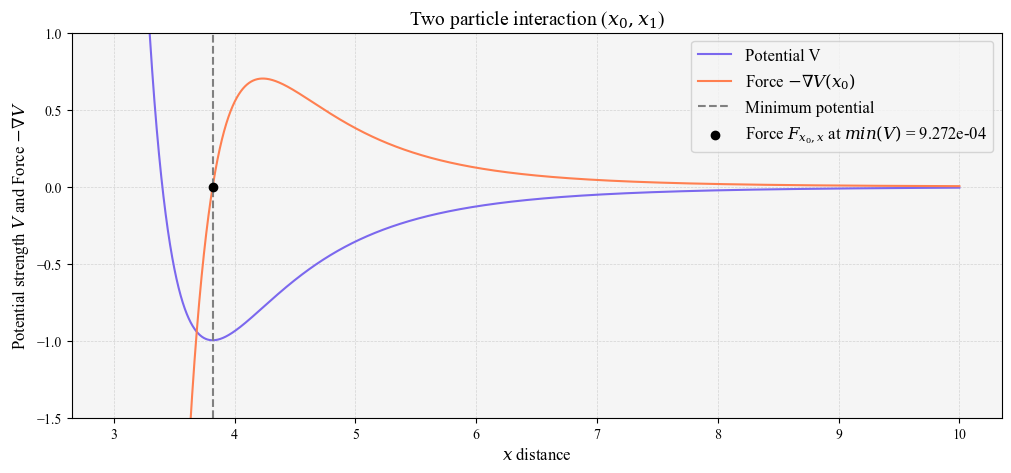

In [8]:


potential = [V_two(xi) for xi in x]
non_zero_x0 = grad[:,0,0]  # Force on particle x0 in x-direction
pot_min = potential[np.argmin(potential)]
force_at_min = non_zero_x0[np.argmin(potential)]

f_label = r'Force $F_{x_0, x}$ at $min(V)$ = ' + f'{force_at_min:.3e}'


fig, ax = plt.subplots(figsize=(12, 5), dpi=100)
ax.plot(x, potential, label='Potential V', color='mediumslateblue')
ax.plot(x, non_zero_x0, label=r'Force $-\nabla V(x_0)$', color='coral')
ax.vlines(x[np.argmin(potential)], ymin=-1.5, ymax=1, colors='grey', linestyles='dashed', label='Minimum potential')
ax.scatter(x[np.argmin(potential)], force_at_min, color='black', zorder=5, label=f_label)


ax.set_title(r'Two particle interaction ($x_0, x_1$)', fontsize=14)
ax.set_xlabel(r'$x$ distance', fontsize=12)
ax.set_ylabel(r'Potential strength $V$ and Force $-\nabla V$', fontsize=12)
ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_ylim(-1.5, 1)



At the minimum of the potential, the force on the two particles is exactly zero, so the particles are in an a rest position (equilibrium).

In [ ]:
# 4 particle gradient
def dV_four(x):
    x0 = np.array([x, 0, 0])
    x1 = np.array([0, 0, 0])
    x2 = np.array([14, 0, 0])
    x3 = np.array([7, 3.2, 0])
    points = np.vstack((x0, x1, x2, x3))

    grad = LJhelp.gradV(points)
    return grad

# x between 3 and 5 to only look at one minimum
x = np.linspace(3, 11, 100000)
grad4 = np.array([dV_four(xi) for xi in x])
grad4_x = grad4[0, :, :]
potential4 = [V_four(xi) for xi in x]

minimum = np.argmin(potential4)
min_x = x[minimum]

print(f"Force working on particle x0 at x = {min_x:.3f}: {grad4_x[0]}")
print(f"Force working on particle x1 at x = {min_x:.3f}: {grad4_x[1]}")
print(f"Force working on particle x2 at x = {min_x:.3f}: {grad4_x[2]}")
print(f"Force working on particle x3 at x = {min_x:.3f}: {grad4_x[3]}")

Force working on particle x0 at x = 3.950: [-55.21445712  -0.20712564   0.        ]
Force working on particle x1 at x = 3.950: [ 5.49325687e+01 -9.47811027e-03  0.00000000e+00]
Force working on particle x2 at x = 3.950: [ 0.02298137 -0.00947811  0.        ]
Force working on particle x3 at x = 3.950: [0.25890705 0.22608186 0.        ]


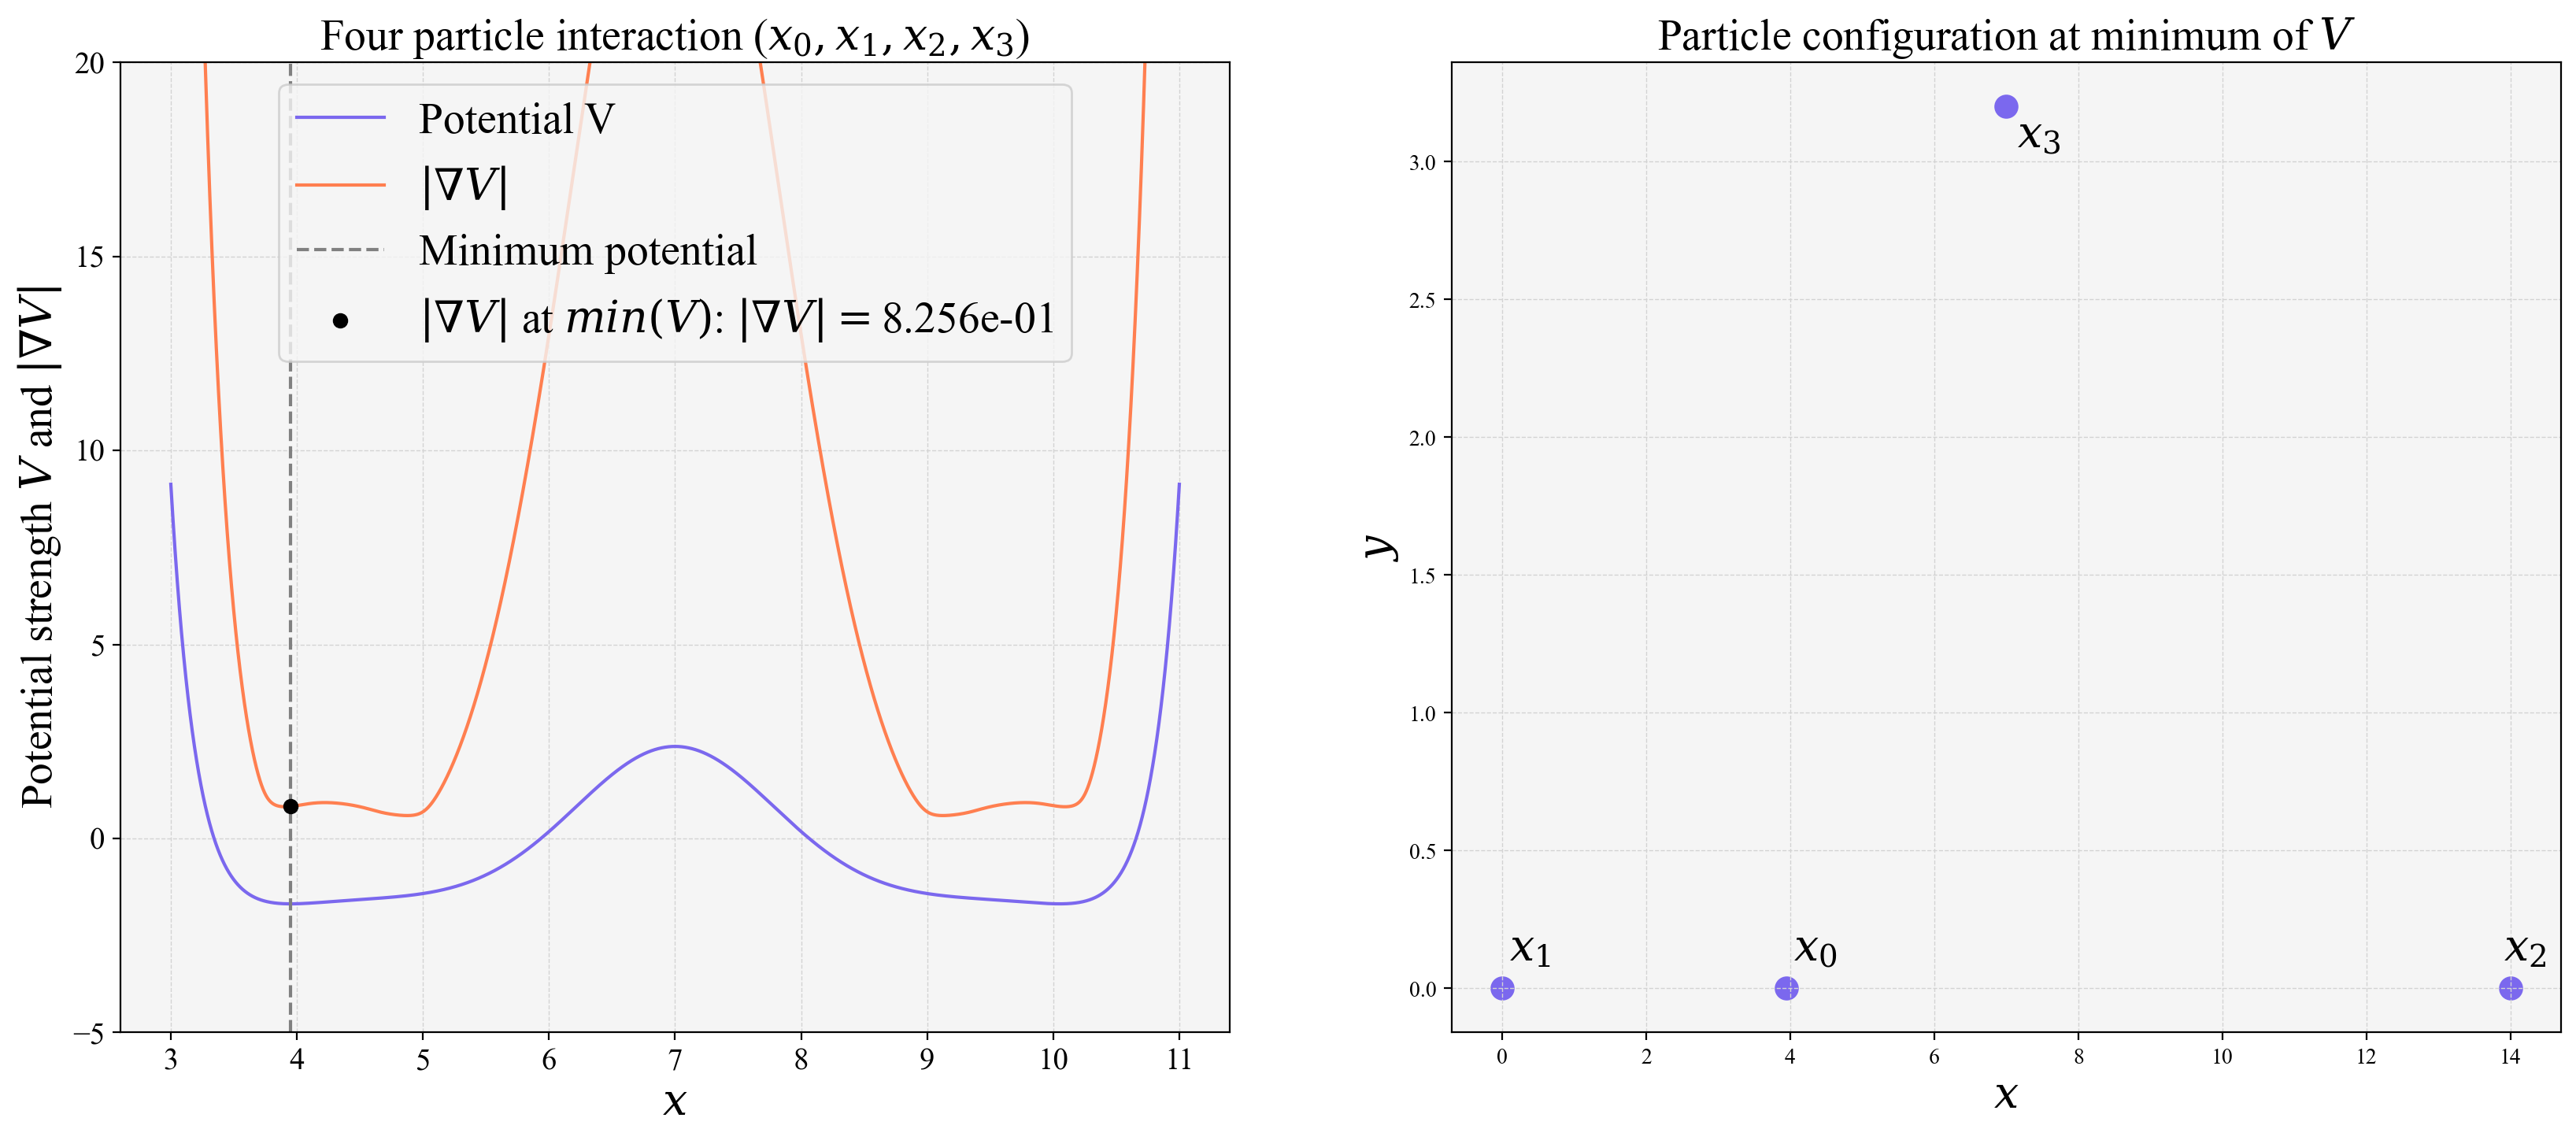

In [10]:
fig, ax = plt.subplots(1,2, figsize=(20, 8), dpi=200)
mag_grad = np.array([np.linalg.norm(gradi, ord=2) for gradi in grad4])
mag_label = r'$|\nabla V|$ at $min(V)$: $|\nabla V| =$' + f'{mag_grad[minimum]:.3e}'

x0 = np.array([x[minimum], 0, 0])
x1 = np.array([0, 0, 0])
x2 = np.array([14, 0, 0])
x3 = np.array([7, 3.2, 0])
points = np.vstack((x0, x1, x2, x3))


ax[0].plot(x, potential4, label='Potential V', color='mediumslateblue')
ax[0].plot(x, mag_grad, label=r'$|\nabla V|$', color='coral')
ax[0].vlines(x[minimum], ymin=-5, ymax=20, colors='grey', linestyles='dashed', label='Minimum potential')
ax[0].scatter(x[minimum], mag_grad[minimum], color='black', zorder=5, label=mag_label)
ax[0].set_title(r'Four particle interaction ($x_0, x_1, x_2, x_3$)', fontsize=20)
ax[0].set_xlabel(r'$x$', fontsize=20)
ax[0].set_ylabel(r'Potential strength $V$ and $|\nabla V|$', fontsize=20)
ax[0].legend(fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_ylim(-5, 20)

ax[1].scatter(points[:,0], points[:,1], s=100, color='mediumslateblue')
for i, point in enumerate(points):
    if i == 2:
        ax[1].text(point[0]-0.1, point[1]+0.1, f'$x_{i}$', fontsize=20)
    elif i == 3:
        ax[1].text(point[0]+0.15, point[1]-0.15, f'$x_{i}$', fontsize=20)
    else:
        ax[1].text(point[0]+0.1, point[1]+0.1, f'$x_{i}$', fontsize=20)


ax[1].set_title('Particle configuration at minimum of $V$', fontsize=20)
ax[1].set_xlabel(r'$x$', fontsize=20);
ax[1].set_ylabel(r'$y$', fontsize=20);

In the four particle system, the magnitude of the force is never zero (yellow line in the plot). If the force is split up into $x$ and $y$ components (the force in $z$ is $0$), the force in one direction might be zero for a certain $x$, but is is never zero in both directions at the same time. I believe this is due to the assymetry of the system shown i the second plot above.

## (F)

In [ ]:
def linesearch(F, X0, d, alpha_max, tolerance=1e-8):
    # Define the 1D function phi(α) = d · F(X0 + α d)
    def phi(alpha):
        return np.sum(d * F(X0 + alpha * d))

    # Using bisection to find root of phi in [0, alpha_max]
    a, b = 0.0, alpha_max
    fa, fb = phi(a), phi(b)
    ncalls = 2

    if fa * fb > 0:
        raise ValueError("No sign change: try larger alpha_max or different direction")

    alpha, extra_calls = bisection_root(phi, a, b, tol=tolerance)
    ncalls += extra_calls

    return alpha, ncalls

X0 = np.array([[4, 0, 0], [0, 0, 0 ], [14, 0, 0], [7, 3.2, 0]])
d = -dV_four(4)
alpha_max = 1.0

alpha, n_calls = linesearch(LJhelp.gradV, X0, d, alpha_max)
print(f"Optimal step length α: {alpha:.3f} with n={n_calls} function calls")
print(f"Gradient at (X0 + α * d) in direction d: {np.dot(LJhelp.gradV(X0 + alpha * d).ravel(), d.ravel())}")

Optimal step length alpha: 0.452 with n=31 function calls
Gradient at (X0 + alpha * d) in direction d: 1.1624196055081193e-08


_____


# Questions for week 5: Nonlinear Optimization

In [12]:
ta_path = 'ArStart.npz'
my_path = '/Users/nielsaugustdavidsen/Documents/GitHub/Scientific_Computing_2025/Assignments/Assignment_3/' + ta_path

# Change to TA path for correcting the assignment
ArStart = np.load(my_path)
print(ArStart.files)

['Xstart2', 'Xstart3', 'Xstart4', 'Xstart5', 'Xstart6', 'Xstart7', 'Xstart8', 'Xstart9', 'Xstart20', 'Xopt20']


## *(G) Golden section minimum*

In [ ]:
def golden_section_min(f, a, b, tol=1e-7):
    tau = (np.sqrt(5) - 1) / 2
    x1 = a + (1 - tau) * (b - a)
    x2 = a + tau * (b - a)
    f1 = f(x1)
    f2 = f(x2)
    n_calls = 2

    while np.abs(b - a) > tol:
        if f1 > f2:
            a = x1
            x1, f1 = x2, f2
            x2 = a + tau * (b - a)
            f2 = f(x2)
        else:
            b = x2
            x2, f2 = x1, f1
            x1 = a + (1 - tau) * (b - a)
            f1 = f(x1)
        n_calls += 1

    if f1 < f2:
        return x1, n_calls
    else:
        return x2, n_calls

def line_V(f, X0, d):
    def phi(alpha):
        return f(X0 + alpha * d)
    return phi

a, b = 0, 1
X0 = np.array([[4, 0, 0], [0, 0, 0 ], [14, 0, 0], [7, 3.2, 0]])
x_opt, n_calls = golden_section_min(line_V(LJhelp.V, X0, d), a, b)

In [ ]:
print(f"Optimal x: {x_opt:.3f} with n={n_calls} function calls")
print("Is x similar to α from linesearch (0.452)?", np.isclose(x_opt, alpha, atol=1e-2))

Optimal x: 0.452 with n=36 function calls
Is x similar to alpha from linesearch (0.452)? True


Below the optimal distance $r_0$ is found for the two particle portential using the Golden-Section-minimizer

In [ ]:
r0_res, nc0 = golden_section_min(V_two, 2, 6)
print(r"r0 for two particle system: " + f"{r0_res:.3f} with n={nc0} function calls")

r0 for two particle system: 3.817 with n=39 function calls


## *(H) BFGS minimizer*

In [ ]:
def BFGS(f, grad, X, tolerance=1e-6, max_iterations=10000, verbose=False):
    converged = False
    X = X.copy()
    B = np.eye(len(X))  # Initial inverse Hessian approximation
    n_calls = 0
    g = grad(X)

    for i in range(max_iterations):
        
        n_calls += 1

        if np.linalg.norm(g) < tolerance:
            converged = True
            if verbose:
                print(f"Converged after {i} iterations and {n_calls} function calls.")
            break
    
        s = np.linalg.solve(B, -g)
        x_new = X + s
        g_new = grad(x_new)
        n_calls += 1

        y = g_new - g
        
        ys = np.dot(y, s)
        Bs = B @ s
        sBs = np.dot(s, Bs)


        B = B + np.outer(y, y) / ys - np.outer(Bs, Bs) / sBs
        X, g = x_new, g_new

        if i == max_iterations - 1 and verbose:
                print(f"Reached maximum iterations ({max_iterations}) with {n_calls} function calls.")

    return X, n_calls, converged



In [16]:
X2 = ArStart['Xstart2']
X_opt, n_calls, converged = BFGS(LJhelp.flat_V, LJhelp.flat_gradV, X2, verbose=True)
X_opt = X_opt.reshape(-1, 3)
print(f"\nOptimized configuration:\n{X_opt} \nfor N={len(X_opt)} particles")
distances = LJhelp.distance(X_opt)
off_diag = [distances[i, j] for i in range(len(distances)) for j in range(len(distances)) if i != j]

print(f"\nInter-particle distances:\n{distances}\n")
print(f"The inter-particle distance is equivalent to the result from (g): {np.allclose(off_diag, r0_res)}")

Converged after 6 iterations and 13 function calls.

Optimized configuration:
[[3.68186699 3.93837516 1.48584684]
 [3.00028518 0.30055214 0.55046137]] 
for N=2 particles

Inter-particle distances:
[[0.         3.81749343]
 [3.81749343 0.        ]]

The inter-particle distance is equivalent to the result from (g): True


## *(I) BFGS minimizer for different N*

In [17]:
import regex as re
import matplotlib
%matplotlib widget

In [18]:
pattern = r"(\d+)"

conv_n = []
for N_config in ArStart.files[:-1]:
    N = int(re.search(pattern, N_config).group(1))
    XN = ArStart[N_config]
    X_opt, n_calls, converged = BFGS(LJhelp.flat_V, LJhelp.flat_gradV, XN, verbose=False)
    if converged:
        conv_n.append(N)
max_n = max(conv_n) if len(conv_n) > 0 else None


In [19]:
def bfgs_plot(N_spec=None):
    r0 = 3.81749343
    pattern = r"(\d+)"
    bfgs_res = []


    for N_config in ArStart.files[:-1]:
        N = int(re.search(pattern, N_config).group(1))

        XN = ArStart[N_config]
        X_opt, n_calls, converged = BFGS(LJhelp.flat_V, LJhelp.flat_gradV, XN, verbose=False)
        X_opt = X_opt.reshape(-1, 3)
        if converged:
            distances = LJhelp.distance(X_opt)
            mask = ~np.eye(distances.shape[0], dtype=bool)

            d_1p = np.sum(np.abs(distances[mask] - r0)/r0 <= 0.01) // 2
            n_bonds = np.sum(mask)//2
            bfgs_res.append({'N': N, 'Function calls': n_calls,'Total # of bonds': n_bonds, 'Bonds within 1% of r0': d_1p, 'Converged': converged})


            if N_spec is not None and N in N_spec:
                fig = plt.figure(figsize=(6, 6), dpi=100)
                ax = fig.add_subplot(111, projection='3d')
                ax.scatter(X_opt[:,0], X_opt[:,1], X_opt[:,2], s=100, color='mediumslateblue', label ='Optimized positions')
                for i, point in enumerate(X_opt):
                    ax.text(point[0]+0.1, point[1]+0.1, point[2]+0.1, f'$x_{{{i}}}$', fontsize=10)
                ax.set_title(f'Optimized configuration for {N} particles', fontsize=14)
                ax.set_xlabel(r'$x$', fontsize=12)
                ax.set_ylabel(r'$y$', fontsize=12)
                ax.set_zlabel(r'$z$', fontsize=12);

                XN_reshaped = XN.reshape(-1, 3)
                ax.scatter(XN_reshaped[:,0], XN_reshaped[:,1], XN_reshaped[:,2], s=100, color='coral', alpha=0.5, label='Starting positions')

                plt.legend()
                plt.show()

        if not converged:
            print(f"Did not converge for {N_config}")
            break
        bfgs_df = pd.DataFrame(bfgs_res)
    return bfgs_df


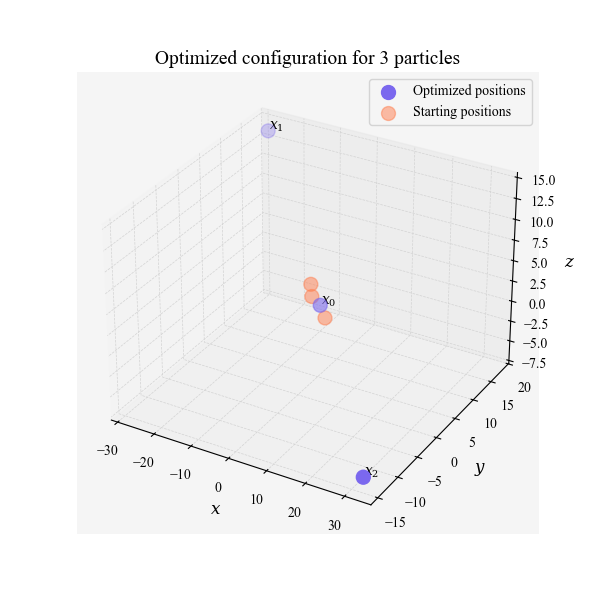

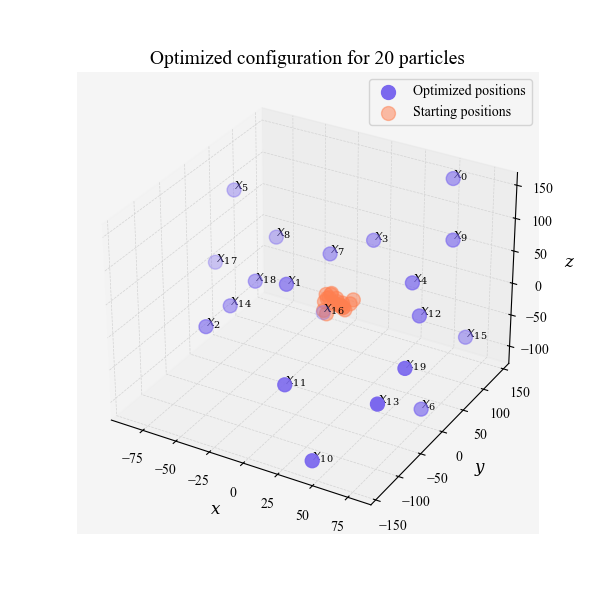

Highest N with convergence: 20
BFGS optimization results:



N,Function calls,Total # of bonds,Bonds within 1% of r0,Converged
2,13,1,1,True
3,33,3,0,True
4,39,6,0,True
5,101,10,0,True
6,59,15,0,True
7,87,21,0,True
8,51,28,0,True
9,7,36,0,True
20,61,190,0,True


In [20]:
N_spec = [3, 20]
bfgs_df = bfgs_plot(N_spec=N_spec)
print("Highest N with convergence:", max_n)
print("BFGS optimization results:\n")
display(bfgs_df.style.hide(axis="index"))

From the table and the plots, it is evident, that even though all configurations converged, all of them (except for $N=2$) failed to have any Van der Waals bonds or even form the disired lattice structure.

## *(G) Line-search BFGS algorithm*

In [21]:

def linesearch_wrapper(f, X, s, alpha_max=1.0, tol=1e-7):
    def phi(alpha):
        return f(X + alpha * s)
    alpha, n_calls = golden_section_min(phi, 0, alpha_max, tol=tol)
    return alpha, n_calls


def BFGS_linesearch(f, gradf, X, tolerance=1e-6, max_iterations=10000, verbose=False):
    converged = False
    X = X.copy()
    B = np.eye(len(X))  # Initial inverse Hessian approximation
    n_calls = 0
    g = gradf(X)

    for i in range(max_iterations):
        
        n_calls += 1

        if np.linalg.norm(g) < tolerance:
            converged = True
            if verbose:
                print(f"Converged after {i} iterations and {n_calls} function calls.")
            break
    
        s = np.linalg.solve(B, -g)
        
        # Line search to find optimal step length alpha
        alpha, ls_calls = linesearch_wrapper(f, X, s)
        n_calls += ls_calls

        s = alpha * s.copy()
        x_new = X + s
        g_new = gradf(x_new.copy())
        n_calls += 1

        y = g_new - g
        
        ys = np.dot(y, s)
        Bs = B @ s
        sBs = np.dot(s, Bs)
        if ys > 1e-12:  # Ensure non-zero division
            B = B + np.outer(y, y) / ys - np.outer(Bs, Bs) / sBs

        X, g = x_new, g_new

        if i == max_iterations - 1 and verbose:
                print(f"Reached maximum iterations ({max_iterations}) with {n_calls} function calls.")

    return X, n_calls, converged

In [22]:
r0 = 3.81749343
pattern = r"(\d+)"
conv_n = []

ls_bfgs_df = []

for N_config in ArStart.files[:-1]:
    N = int(re.search(pattern, N_config).group(1))
    XN = ArStart[N_config]
    X_opt, n_calls, converged = BFGS_linesearch(LJhelp.flat_V, LJhelp.flat_gradV, XN, verbose=False)
    X_opt = X_opt.reshape(-1, 3)

    distances = LJhelp.distance(X_opt)
    mask = ~np.eye(distances.shape[0], dtype=bool)
    d_1p = np.sum(np.abs(distances[mask] - r0)/r0 <= 0.01) // 2  # Each bond is counted twice in the mask
    n_bonds = np.sum(mask) // 2  # Each bond is counted twice in the mask

    ls_bfgs_df.append({'N': N, 'Function calls': n_calls, 'Total # Bonds': n_bonds, 'Bonds within 1% of r0 ': d_1p, 'converged': converged})
    if converged:
        conv_n.append(N)
ls_bfgs_df = pd.DataFrame(ls_bfgs_df)


In [23]:

max_n = max(conv_n) if len(conv_n) > 0 else None
print("Highest N with convergence:", max_n)
print("Summary of line-search BFGS results:")
display(ls_bfgs_df.style.hide(axis="index"))

Highest N with convergence: 20
Summary of line-search BFGS results:


N,Function calls,Total # Bonds,Bonds within 1% of r0,converged
2,39,1,1,True
3,647,3,3,True
4,761,6,6,True
5,24321,10,9,True
6,8741,15,12,True
7,6613,21,15,True
8,5169,28,18,True
9,2965,36,19,True
20,66957,190,23,True


As seen from the table, many more Van der Waals bonds are achieved between the particles. This is also visible in the plots below, where most configurations form nice lattice-like structures. This came at the cost of a lot more function calls, but the algorithms are generally fast to run. 

In [24]:
def opt_plot(spec_N = None, xfiles=ArStart):
    pattern = r"(\d+)"

    for config in xfiles.files:
        N = int(re.search(pattern, config).group(1))

        if N not in spec_N and spec_N is not None:
            continue
    
        XN = ArStart[config]
        X_opt_ls, n_calls_ls_bfgs, converged_ls = BFGS_linesearch(LJhelp.flat_V, LJhelp.flat_gradV, XN, verbose=False)

        if converged and converged_ls:
            X_opt_ls = X_opt_ls.reshape(-1, 3)

            fig = plt.figure(figsize=(8, 6), dpi=100)
            ax = fig.add_subplot(121, projection='3d')
            ax.scatter(X_opt_ls[:,0], X_opt_ls[:,1], X_opt_ls[:,2], s=100, color='mediumslateblue', label ='Optimized positions BFGS with line search')
            for i, point in enumerate(X_opt_ls):
                ax.text(point[0]+0.1, point[1]+0.1, point[2]+0.1, f'$x_{{{i}}}$', fontsize=10)
            ax.set_title(f'Optimized configuration for {N} particles using BFGS', fontsize=14)
            ax.set_xlabel(r'$x$', fontsize=12)
            ax.set_ylabel(r'$y$', fontsize=12)
            ax.set_zlabel(r'$z$', fontsize=12);

            XN_reshaped = XN.reshape(-1, 3)

            if N != 20:
                ax.scatter(XN_reshaped[:,0], XN_reshaped[:,1], XN_reshaped[:,2], s=100, color='coral', alpha=0.5, label='Starting positions')

            # Connect all pairs of points with lines for optimized positions
            for i in range(N):
                for j in range(i+1, N):
                    ax.plot([X_opt_ls[i,0], X_opt_ls[j,0]], [X_opt_ls[i,1], X_opt_ls[j,1]], [X_opt_ls[i,2], X_opt_ls[j,2]], color='lightgrey', alpha=0.5)
            

            plt.legend()
            plt.show()
    return


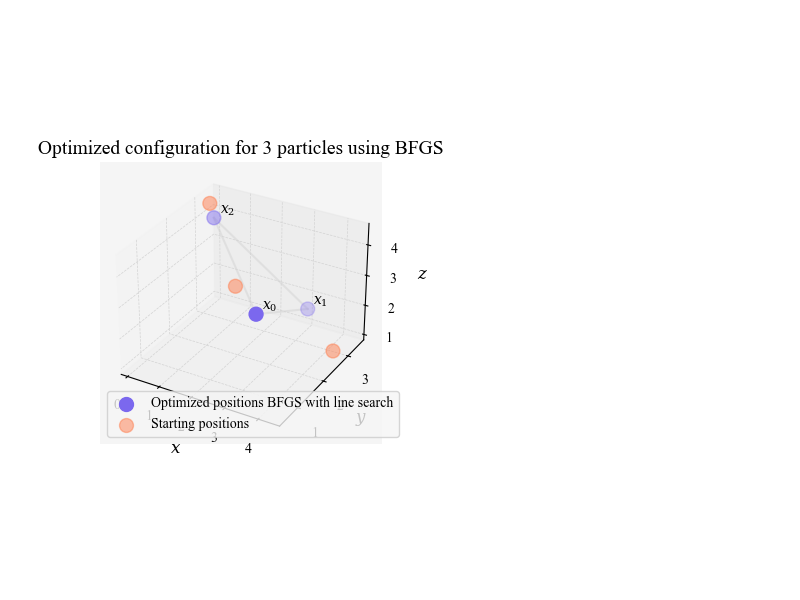

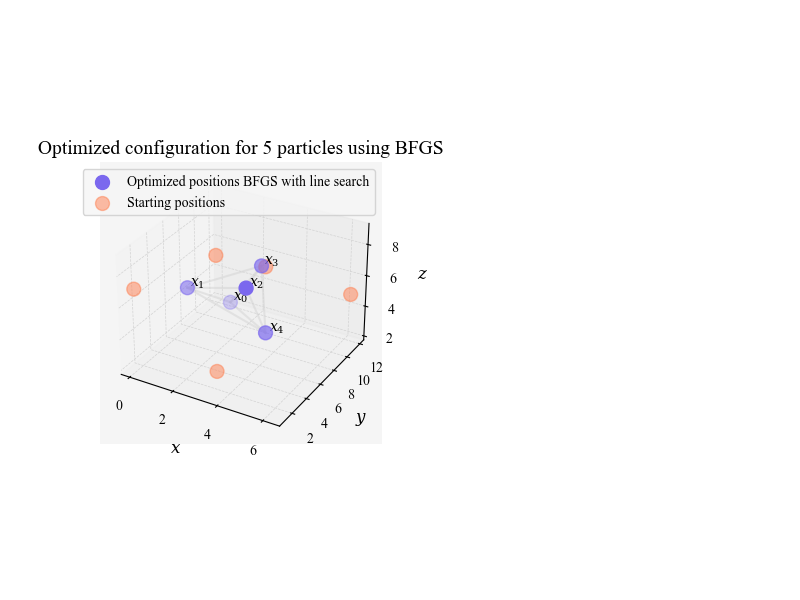

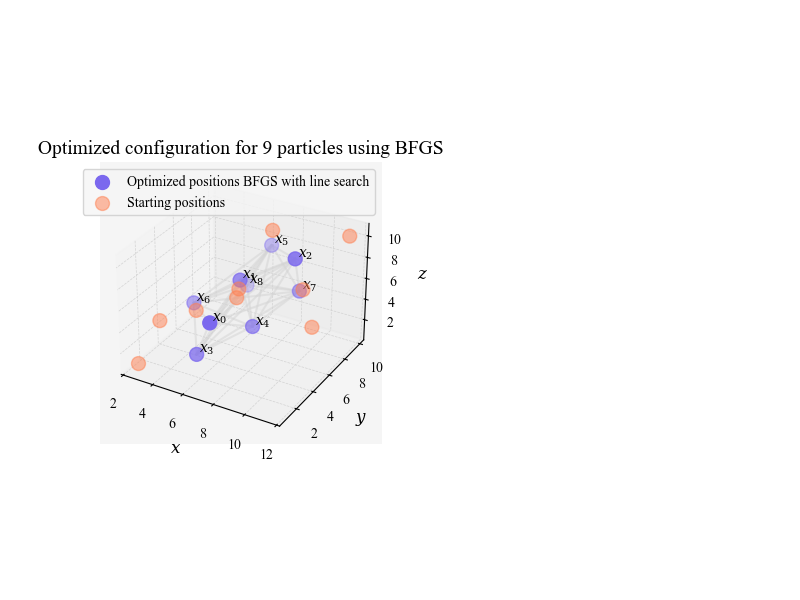

In [25]:
specific_N = [3, 5, 9]
for n in specific_N:
    opt_plot(spec_N=[n])

The plots above show the optimized particle positions from the BFGS algorithm with implemented line searching. For the three chosen $N \in [3, 5, 9]$ the particles behave as expected forming a lattice in 3D where most of the bonds are within 1% of $r_0$. For the $N=20$ configuration, all except one particle behaves well - one is placed very far from all other particles.